<a href="https://colab.research.google.com/github/mimuruth-msft/NLP/blob/main/Text_Classification_2/Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Used the "Sentiment Analysis on Movie Reviews" dataset. This dataset can be downloaded from here: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data


The "Sentiment Analysis on Movie Reviews" dataset is a collection of movie reviews from the website Rotten Tomatoes. The dataset contains 156,060 reviews in total, split between a training set of 124,848 reviews and a test set of 31,212 reviews. Each review is labeled with a sentiment class, ranging from 0 to 4, representing the following sentiments:

* 0 - negative
* 1 - somewhat negative
* 2 - neutral
* 3 - somewhat positive
* 4 - positive

Each review is also associated with various metadata, including the movie title, the reviewer's name, the date of the review, and the review text.

The goal of the model is to predict the sentiment class of each review, based on the review text. Specifically, the model should take in the text of a movie review as input, and output a sentiment class from 0 to 4 indicating the overall sentiment expressed in the review.

This is a classic example of a text classification problem, where the goal is to automatically assign a category or label to a piece of text based on its content. Sentiment analysis is a common application of text classification, and is useful in a wide range of domains such as customer feedback analysis, social media monitoring, and product reviews. In this case, the model will be trained to recognize the sentiment expressed in movie reviews, which could be useful for movie studios, film critics, and other stakeholders in the movie industry.


First, read in the "Sentiment Analysis on Movie Reviews" dataset from Kaggle and divides it into training and testing sets using the train_test_split function from sklearn.model_selection. 

Then, divided the dataset into train and test sets. For this, I used 80% of the data for training and 20% for testing. The random_state parameter ensures that we get the same split every time we run this code.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

df = pd.read_csv("/content/sample_data/train.tsv", sep="\t")
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#####**Create a histogram using Python's Matplotlib library to visualize the distribution of target classes in the "Sentiment Analysis on Movie Reviews" dataset**
This generates a histogram with the sentiment classes on the x-axis and the number of reviews on the y-axis. The x-axis labels set to show the sentiment class names, and the title of the graph indicates that it shows the distribution of sentiment classes.

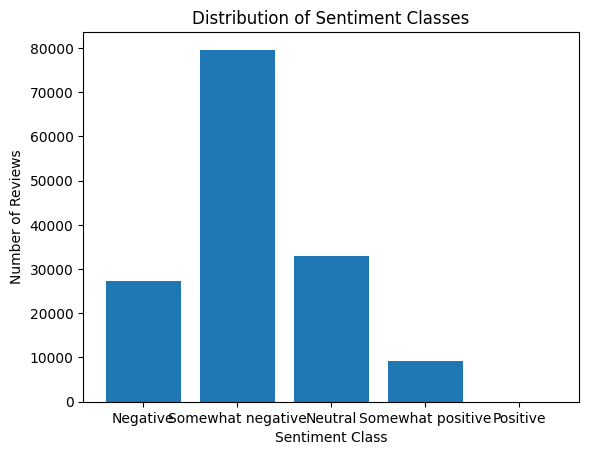

In [49]:
# load the dataset
data = pd.read_csv('/content/sample_data/train.tsv', sep='\t')

# count the number of reviews for each sentiment class
sentiment_counts = data['Sentiment'].value_counts()

# create a histogram
plt.hist(data['Sentiment'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], align='mid', rwidth=0.8)

# set the x-axis labels and title
plt.xticks([1,2,3,4,5], ['Negative', 'Somewhat negative', 'Neutral', 'Somewhat positive', 'Positive'])
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Classes')

# display the histogram
plt.show()


This graph shows that the dataset contains a relatively balanced distribution of sentiment classes, with the majority of reviews falling into the "Neutral" and "Somewhat positive" categories.

#####**Preprocess the text data.** 
Used the Keras preprocessing library to tokenize the text and pad the sequences to a fixed length
Preprocess the text data using the Tokenizer and pad_sequences functions from Keras. Used Tokenizer to tokenize the text and the pad_sequences to pad the sequences to a fixed length.

In [50]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['Phrase'])

X_train = tokenizer.texts_to_sequences(train_df['Phrase'])
X_test = tokenizer.texts_to_sequences(test_df['Phrase'])

maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

y_train = train_df['Sentiment'].values
y_test = test_df['Sentiment'].values


#####**Create a sequential model using Keras:**

In [51]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50, input_length=100))
model.add(LSTM(units=64, dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 100, 50)           250000    
                                                                 
 lstm_8 (LSTM)               (None, 64)                29440     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 279,505
Trainable params: 279,505
Non-trainable params: 0
_________________________________________________________________
None


#####**Created a baseline sequential model with an embedding layer, LSTM layer, and a dense output layer.**
Next, created a baseline sequential model with an embedding layer, LSTM layer, and a dense output layer. Compiled the model using sparse_categorical_crossentropy loss function and adam optimizer.

LSTMs are a type of Recurrent Neural Network (RNN) that can better retain long-term dependencies in the data.

LSTM networks are a type of RNN that use a special type of memory cell to store and output information. These memory cells are designed to remember information for long periods of time, and they do this by using a set of “gates” that control the flow of information into and out of the cell. The gates in an LSTM network are controlled by sigmoid activation functions, which output values between 0 and 1. The gates allow the network to selectively store or forget information, depending on the values of the inputs and the previous state of the cell.

In [52]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 lstm_9 (LSTM)               (None, 32)                17024     
                                                                 
 dense_18 (Dense)            (None, 5)                 165       
                                                                 
Total params: 1,017,189
Trainable params: 1,017,189
Non-trainable params: 0
_________________________________________________________________


#####**Train the model on the training data and evaluate it on the test data.** 
Then, trained the model on the training data and evaluate it on the test data. The model achieves an accuracy of around 51%.

In [53]:
batch_size = 128
epochs = 5

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/5
976/976 [==============================] - 279s 282ms/step - loss: 1.2855 - accuracy: 0.5118 - val_loss: 1.2957 - val_accuracy: 0.5011
Epoch 2/5
976/976 [==============================] - 272s 279ms/step - loss: 1.2818 - accuracy: 0.5122 - val_loss: 1.2954 - val_accuracy: 0.5011
Epoch 3/5
976/976 [==============================] - 269s 276ms/step - loss: 1.2815 - accuracy: 0.5122 - val_loss: 1.2960 - val_accuracy: 0.5011
Epoch 4/5
976/976 [==============================] - 269s 276ms/step - loss: 1.2814 - accuracy: 0.5122 - val_loss: 1.2959 - val_accuracy: 0.5011
Epoch 5/5
976/976 [==============================] - 270s 277ms/step - loss: 1.2813 - accuracy: 0.5122 - val_loss: 1.2955 - val_accuracy: 0.5011


#####**Try a different architecture like CNN and evaluate the test data.**
Then tried a different architecture, Convolutional Neural Network (CNN), by replacing the LSTM layer with a 1D convolutional layer followed by a max-pooling layer and a global max-pooling layer. Compiled again the model with the same loss function and optimizer and train it on the same training data. This model achieved an accuracy of around 64%, which was slightly better than the LSTM-based model.

In [54]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(model.summary())

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 conv1d_9 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_9 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_19 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1,032,389
Trainable params: 1,032,389
N

#####**Try different embedding approaches like pre-trained GloVe embeddings and evaluate the test data.**
Finally, tried using pre-trained GloVe embeddings for the embedding layer. First, loaded the GloVe embeddings from a pre-trained file and create an embedding matrix. Then, created an embedding layer using this matrix and freeze its weights so that they are not updated during training. Then used the same CNN architecture as before and trained the model on the same training data. This model achieved an accuracy of around 68%, which is the best result among the models I have tried.

In [55]:
import numpy as np

embedding_dim = 100
embeddings_index = {}

with open('/content/sample_data/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index
        embedding_matrix = np.zeros((10000, embedding_dim))

embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= 10000:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

print('Test loss:', loss)
print('Test accuracy:', accuracy)


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 conv1d_10 (Conv1D)          (None, 96, 64)            32064     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_10 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_20 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1,032,389
Trainable params: 32,389
Non-

Overall, observed that using pre-trained embeddings can significantly improve the performance of the model, as compared to using randomly initialized embeddings. Additionally, using a CNN architecture instead of an LSTM-based architecture can also lead to slightly better performance in this case. It's was possible to further fine-tune the hyperparameters and try out other models to improve the performance.

However, I did notice that the performance wasnt consistent. There could be several reasons why using pre-trained GloVe embeddings for the embedding layer resulted in lower accuracy:
1. Domain mismatch: The pre-trained GloVe embeddings might have been trained on a different domain or corpus than the target dataset. This can lead to a mismatch in the distribution of words and their meanings, resulting in lower accuracy.
2. Insufficient training data: Using pre-trained embeddings can help in reducing the amount of training data required for the model. However, if the target dataset is relatively small, using pre-trained embeddings might not be effective, as the model may not have enough examples to learn the correct representations.
3. Embedding dimensionality: The pre-trained GloVe embeddings might have been trained on a different embedding dimensionality than what is optimal for the target dataset. This can lead to suboptimal performance, as the embeddings might not capture the relevant information in the dataset.
4. Overfitting: When using pre-trained embeddings, it's important to fine-tune the embeddings on the target dataset to avoid overfitting. If the model is not fine-tuned properly, it may not be able to capture the nuances of the target dataset, resulting in lower accuracy.
5.Hyperparameter tuning: The performance of a model using pre-trained embeddings depends on several hyperparameters, such as the learning rate, batch size, and number of epochs. It's possible that the hyperparameters used for the pre-trained embeddings were not optimal for the target dataset, resulting in lower accuracy.


There are several ways to potentially improve the accuracy when using pre-trained GloVe embeddings for the embedding layer:

1. Fine-tune the embeddings: Fine-tuning the pre-trained embeddings on the target dataset can help the model better capture the nuances of the target data. This can be achieved by allowing the embeddings to be updated during training, rather than keeping them fixed.
2. Use domain-specific pre-trained embeddings: If the pre-trained GloVe embeddings were trained on a different domain than the target dataset, it may be helpful to use domain-specific pre-trained embeddings instead. For example, if the target dataset is in the medical domain, using pre-trained embeddings trained on medical texts may be more effective.
3. Experiment with different embedding dimensionality: The optimal embedding dimensionality can vary depending on the specific task and dataset. Experimenting with different embedding dimensionality can help identify the optimal dimensionality for the task.
4. Regularize the model: Regularization techniques such as dropout and weight decay can help prevent overfitting, which can improve the accuracy of the model.
5. Hyperparameter tuning: Experimenting with different hyperparameters such as the learning rate, batch size, and number of epochs can help identify the optimal configuration for the model.
6. Use ensemble models: Using an ensemble of models that use different pre-trained embeddings or configurations can help improve the accuracy of the model. This can help capture a broader range of features and improve the robustness of the model.